##### Librerías

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Carga de datos

In [2]:
path = 'output/data.csv'
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29138 entries, 0 to 29137
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   N°         29138 non-null  int64 
 1   MODALIDAD  29138 non-null  object
 2   DNI        29138 non-null  int64 
 3   REGION     29138 non-null  object
 4   PJ ENP     29138 non-null  int64 
 5   PJ CP      29138 non-null  int64 
 6   PJ FIN     29138 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.6+ MB


In [3]:
x,y = data.shape
print('Cantidad de postulantes preseleccionados:',x)

Cantidad de postulantes preseleccionados: 29138


##### Cantidad de Postulantes por Región

In [17]:
'''
Se crea una función para realizar gráficos por un campo categórico de una columna
'''

def grafica_por_categoria(data, category, x_size=12, y_size=4, titulo='Frecuencia por {category}'):
    # Contar las frecuencias de cada categoría
    counts = data[category].value_counts().sort_values(ascending=True)

    # Crear una figura con tamaño especifico
    plt.figure(figsize=(x_size, y_size))

    # Crear el gráfico de barras horizontales
    ax = counts.plot(kind='barh', width=0.8)

    ax.set_ylabel('') # Eliminar el titulo del eje Y
    ax.set_xticklabels([]) # Elimina las marcas del eje X

    # Agregar los valores sobre las barras
    for p in ax.patches:
        ax.text(p.get_width() + 0.2, p.get_y() + p.get_height() / 2,
                f'{p.get_width():.0f}', va='center')

    # Eliminar los bordes (spines)
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Agregar un titulo al grafico
    ax.set_title(titulo, fontsize=12)

    # Mostrar el gráfico
    plt.show()


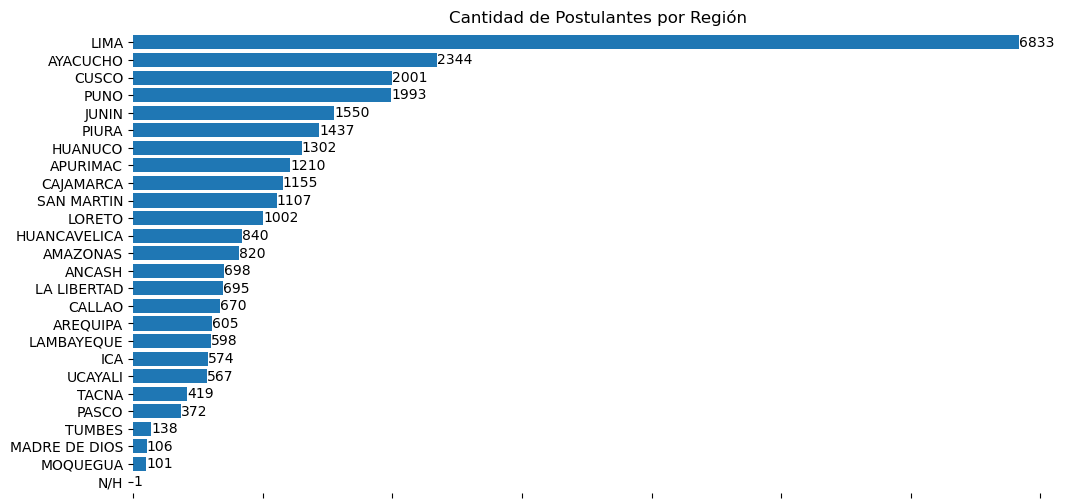

In [23]:
grafica_por_categoria(data, category='REGION', y_size=6, titulo='Cantidad de Postulantes por Región')

* El porcentaje de postulantes preseleccionados de Lima representa el 23.45% del total de regiones.
* Las 3 regiones con la mayor cantidad de postulantes provienen de Lima, Ayacucho y Cusco.
* Hay un postulante que no tiene registrado el campo de REGION y se indica como N/H.

##### Cantidad de Postulantes por Modalidad de Beca

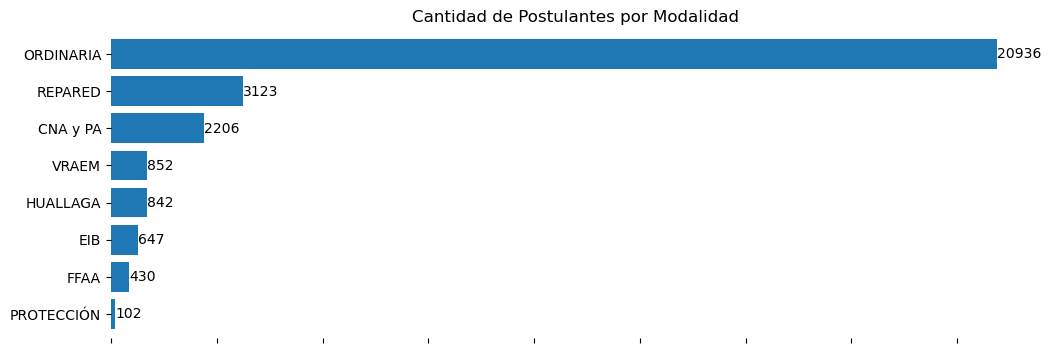

In [24]:
grafica_por_categoria(data, category='MODALIDAD', y_size=4, titulo='Cantidad de Postulantes por Modalidad')

* La mayor parte de postulantes postulan a la categoría ORDINARIA que representa el 71.85% del total
* Las otras modalidades tienen una demanda menor como Beca FF.AA. y Beca Protección.

##### Cantidad de Postulante por Región y Modalidad

In [15]:
regiones = list(data['REGION'].unique())

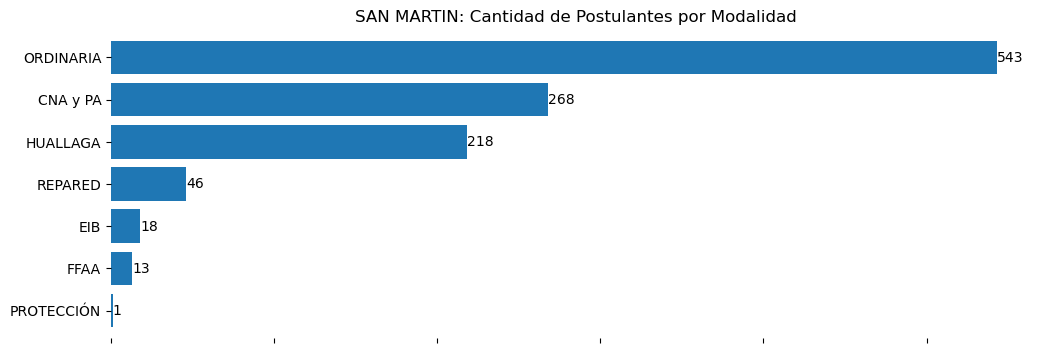

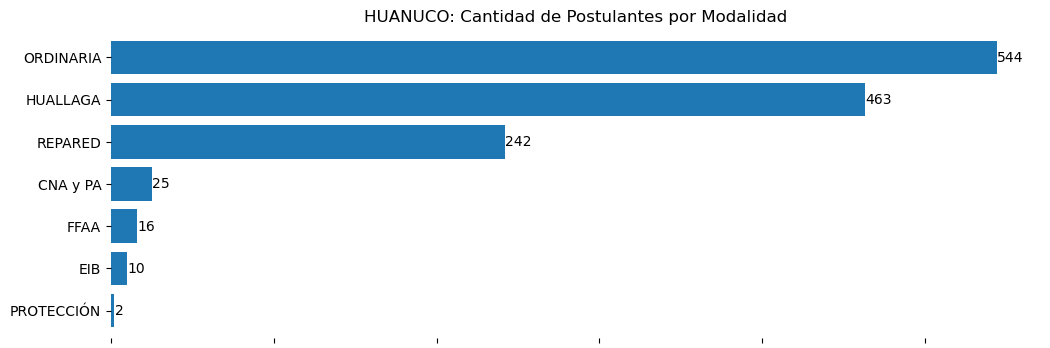

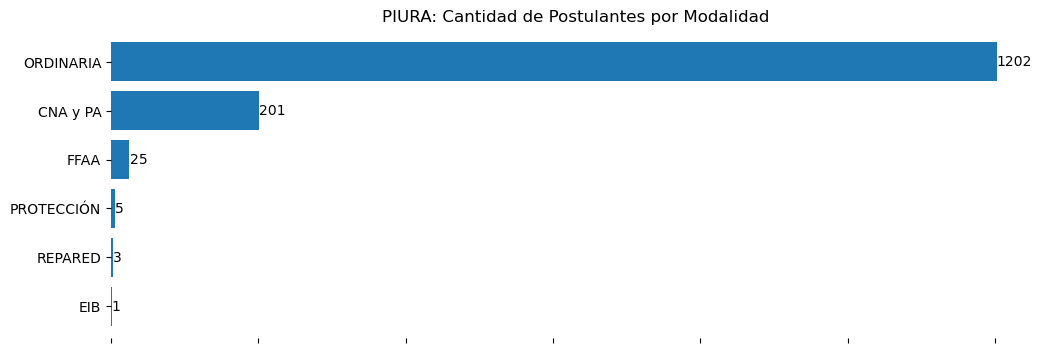

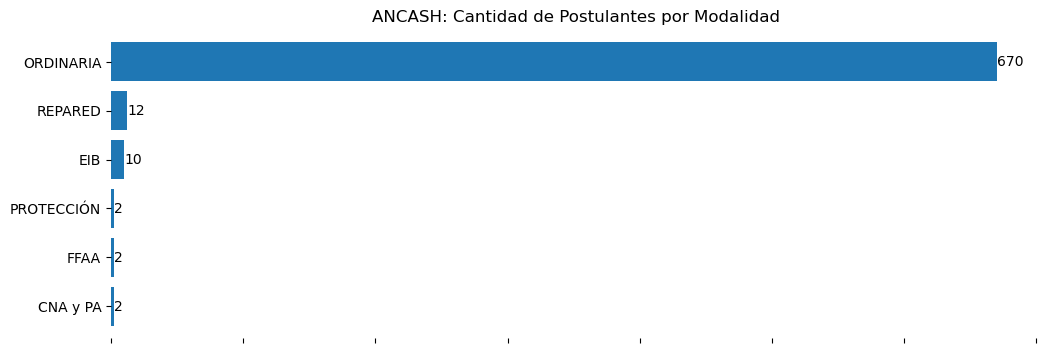

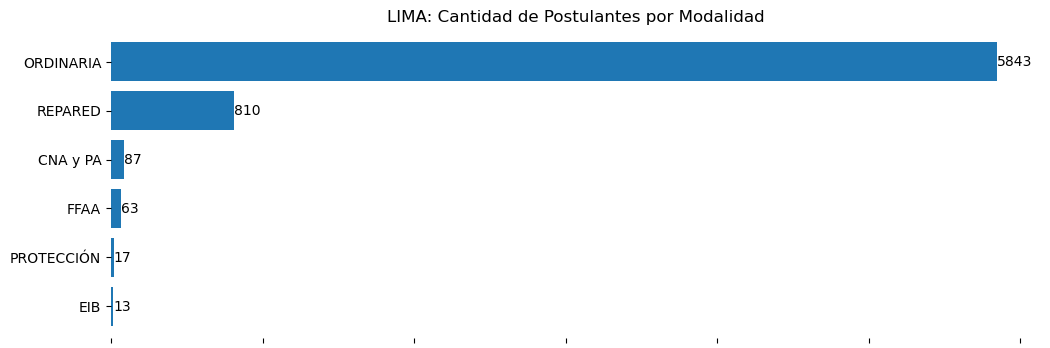

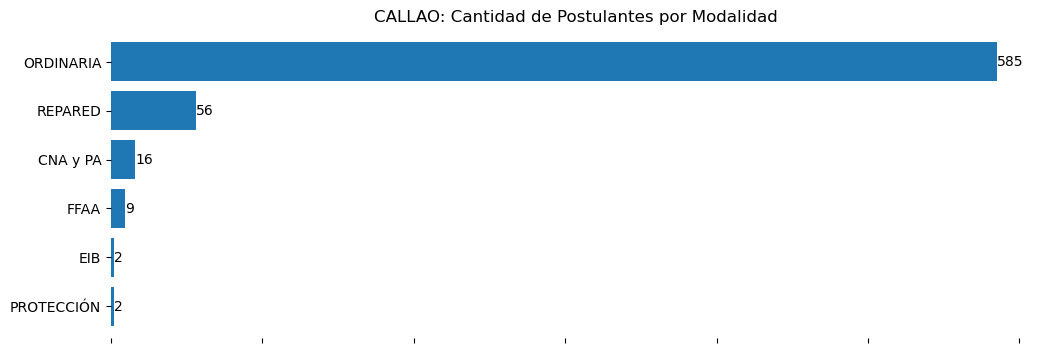

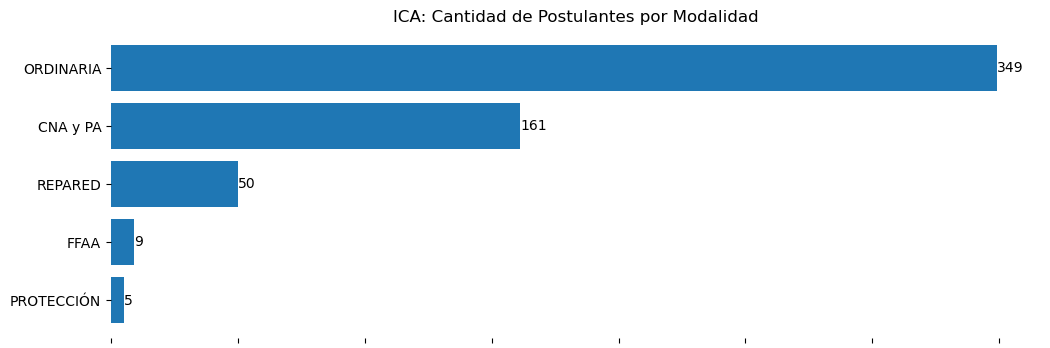

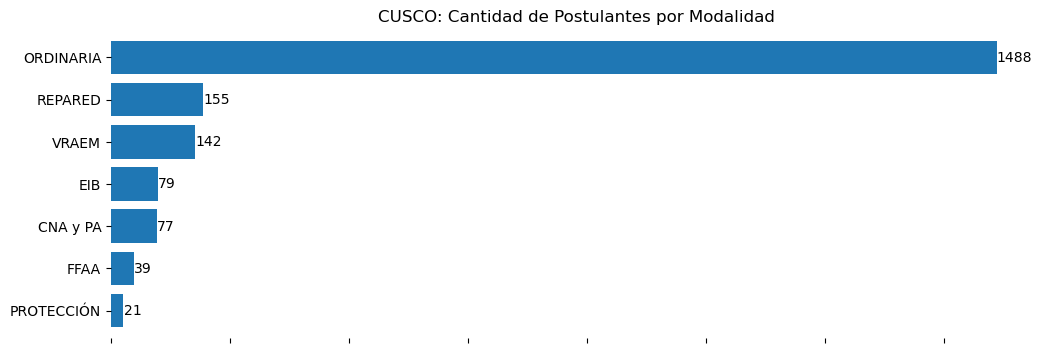

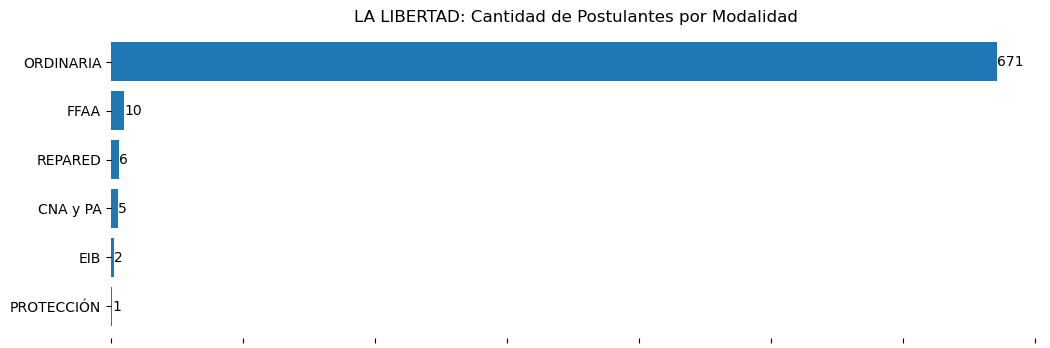

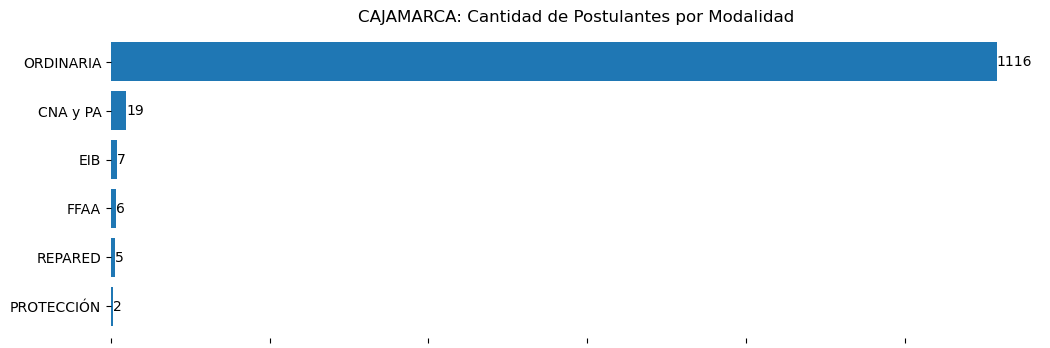

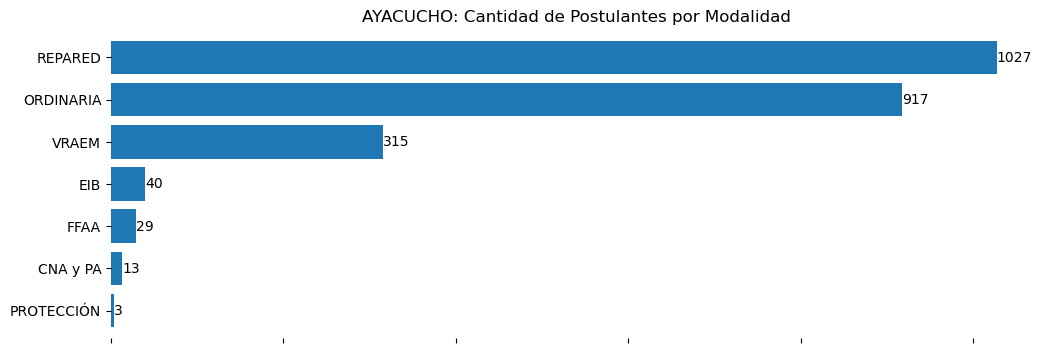

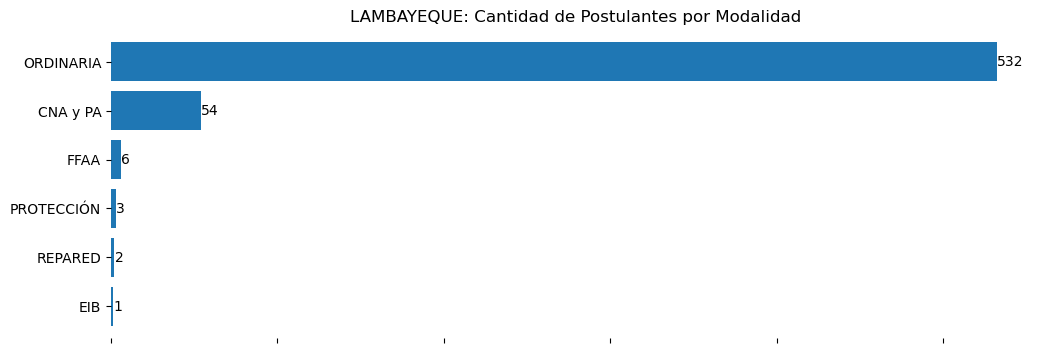

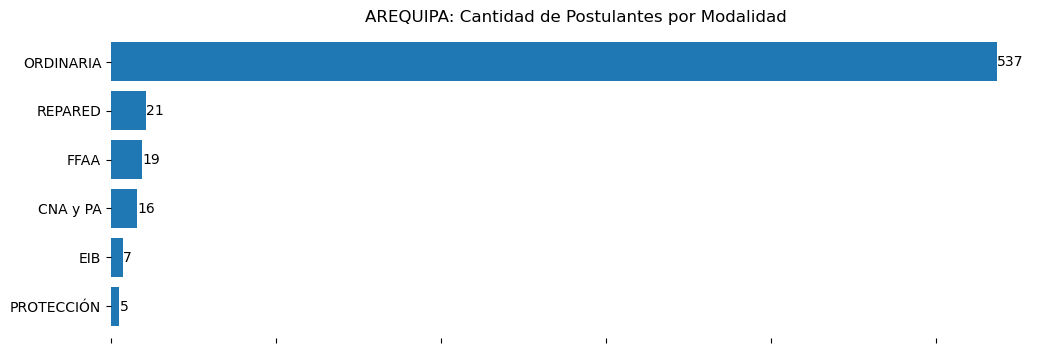

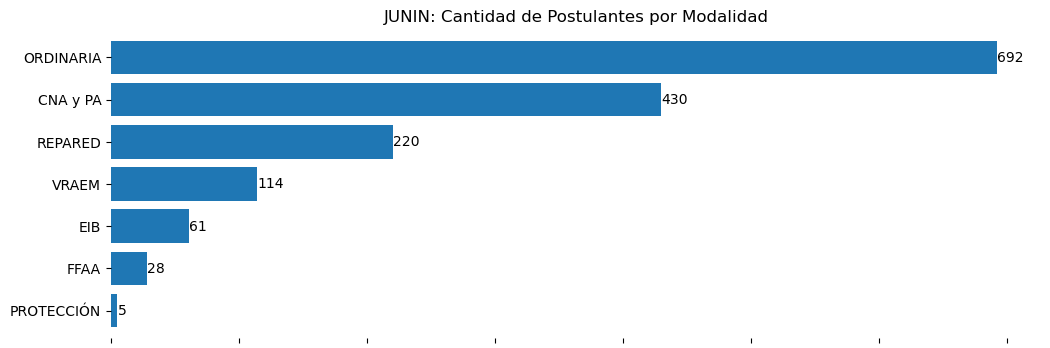

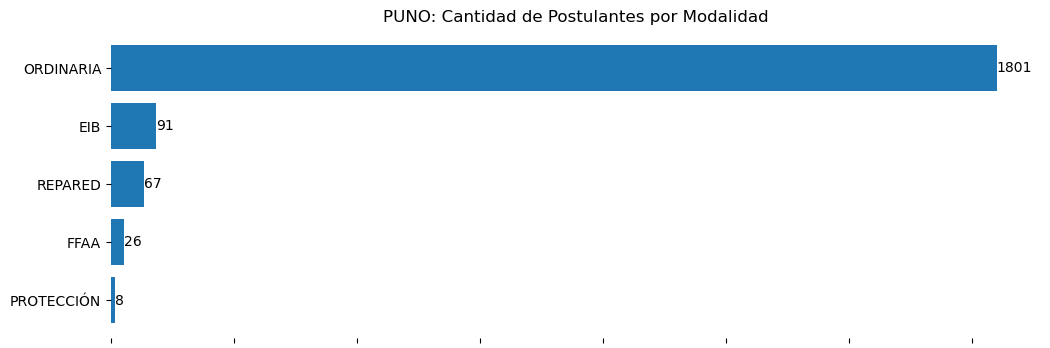

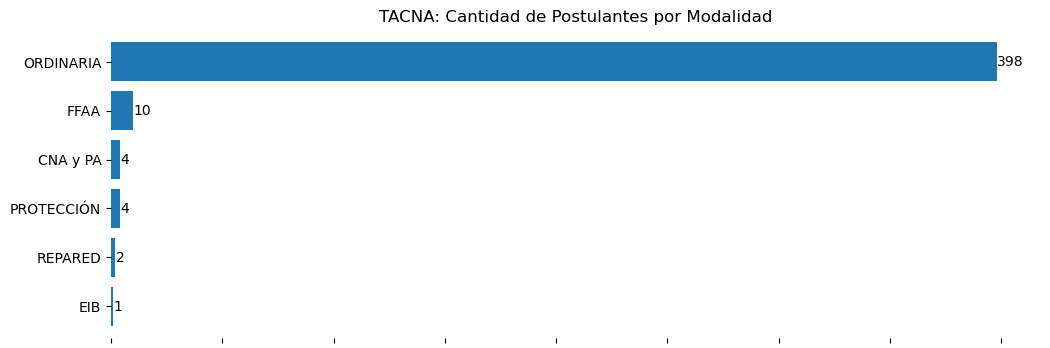

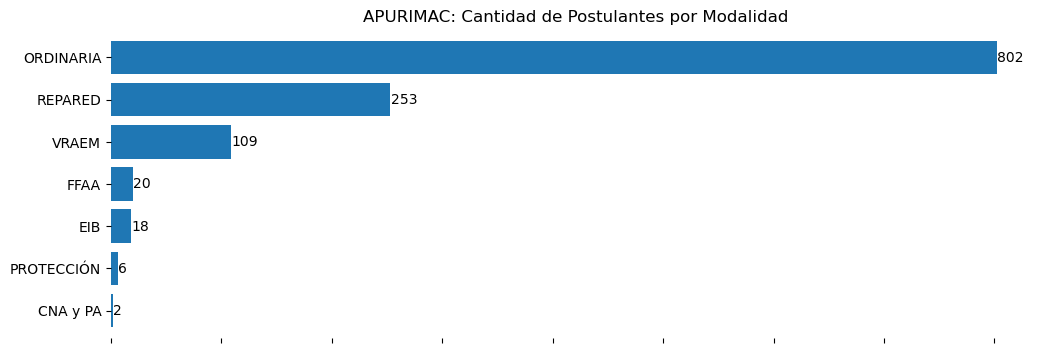

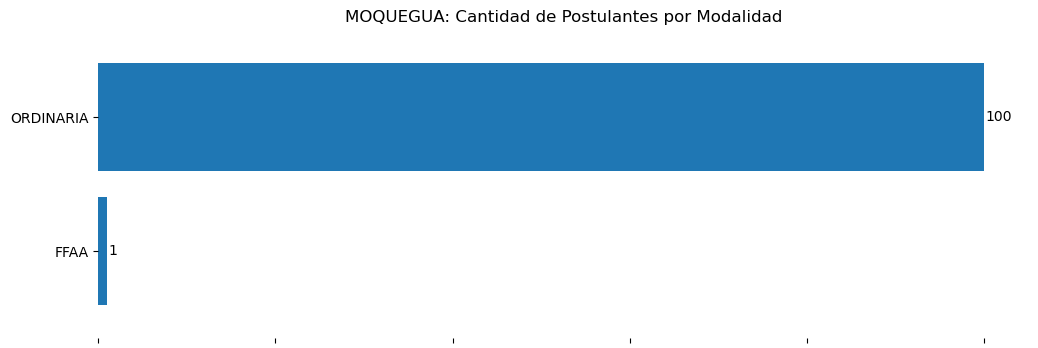

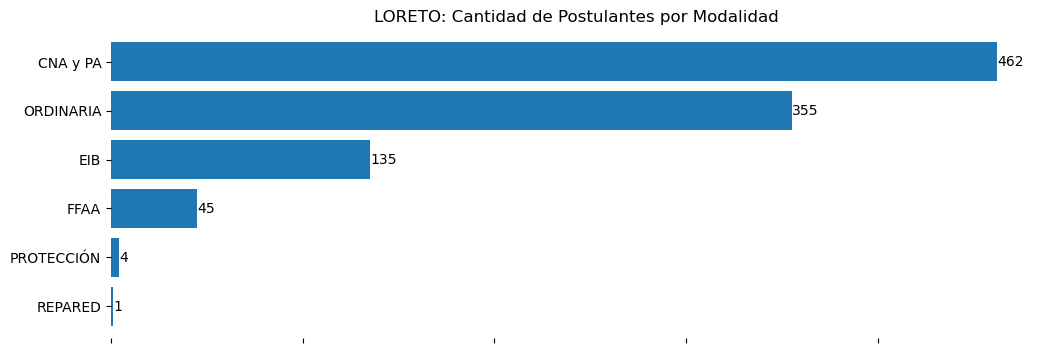

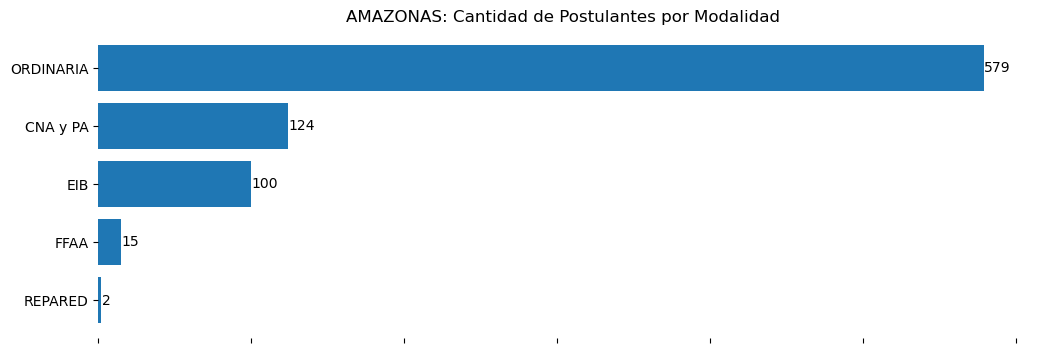

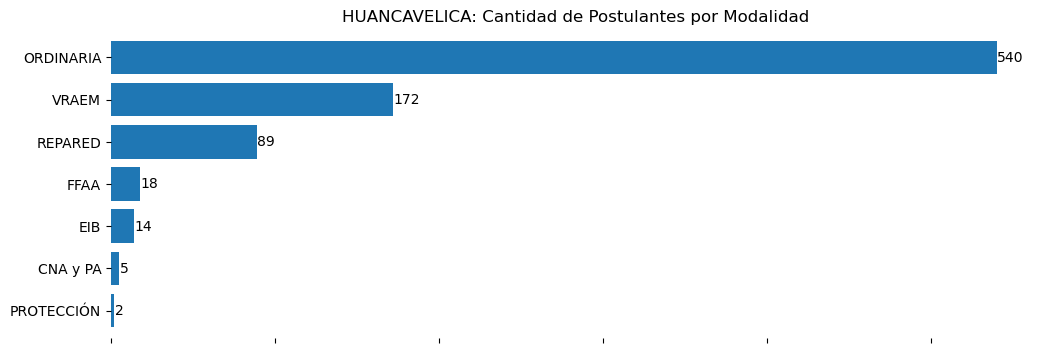

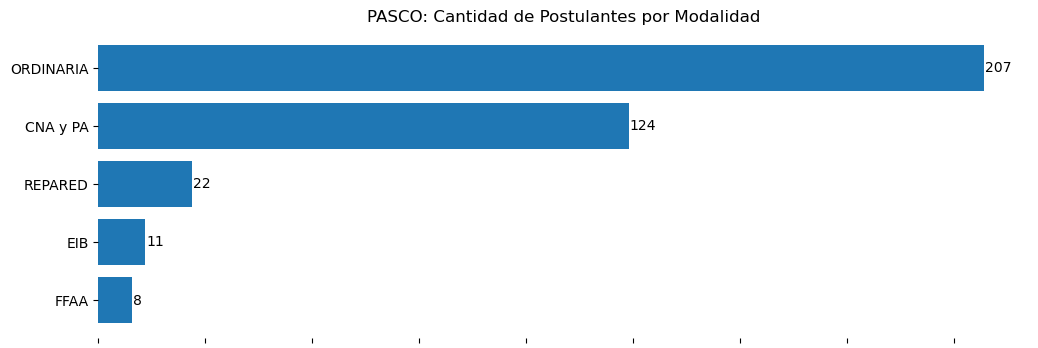

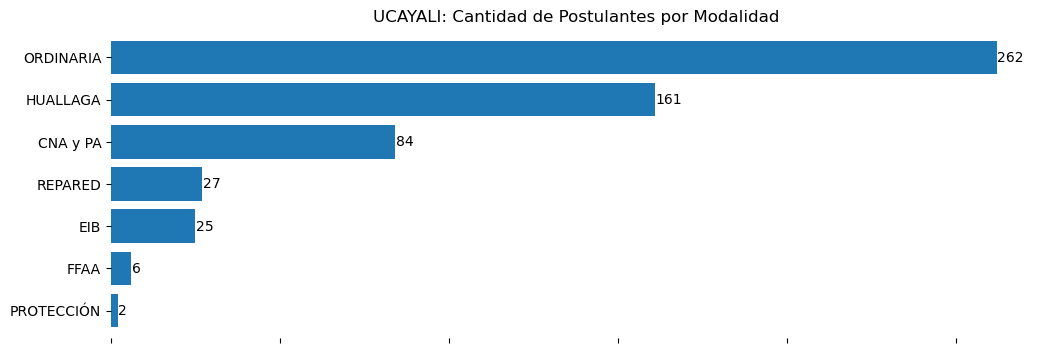

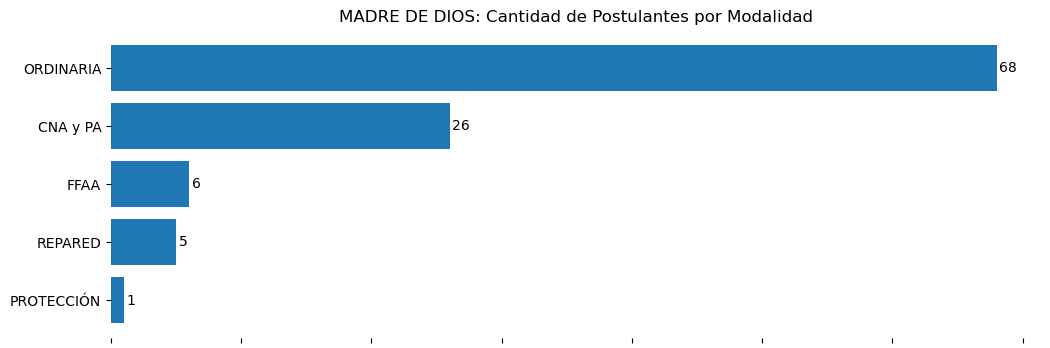

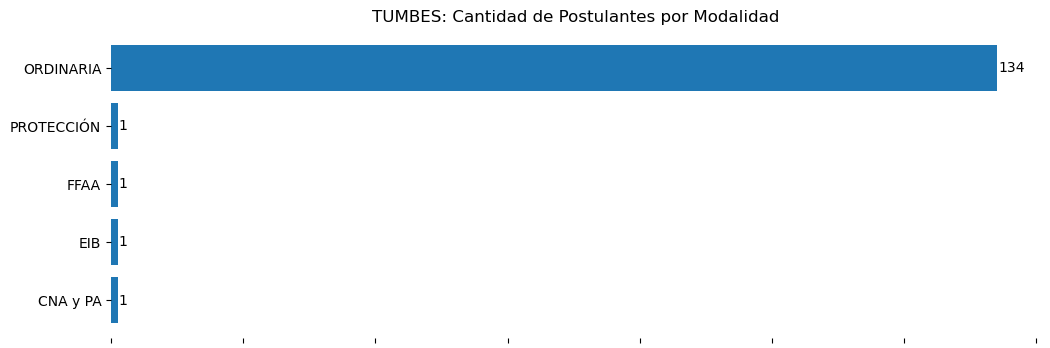

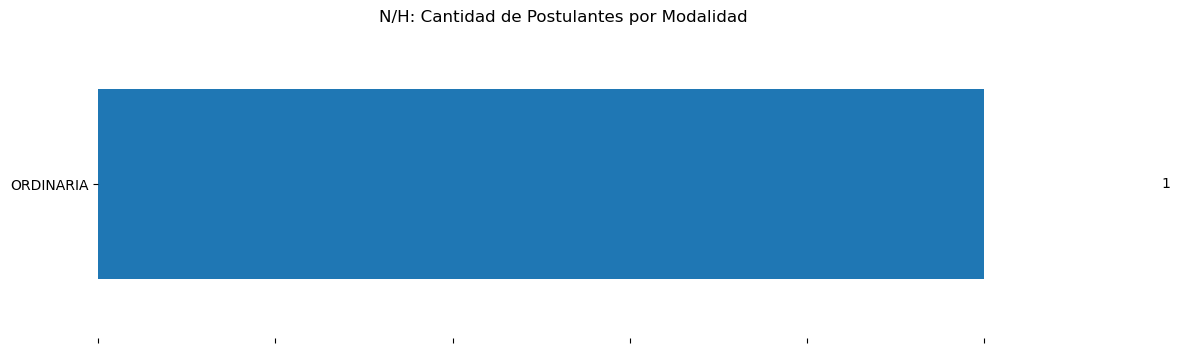

In [16]:
for rg in regiones:
    df_rg = data[data['REGION']==rg]
    grafica_por_categoria(df_rg, category='MODALIDAD', y_size=4, titulo=f'{rg}: Cantidad de Postulantes por Modalidad')

* La categoria ORDINARIA es la más demandada en la mayoría de las regiones. Excepto en Ayacucho y Loreto, donde la categoría CNA y PA presenta la mayor cantidad de postulantes.
* La segunda modalidad de beca más demandada es CNA Y PA o REPARED.

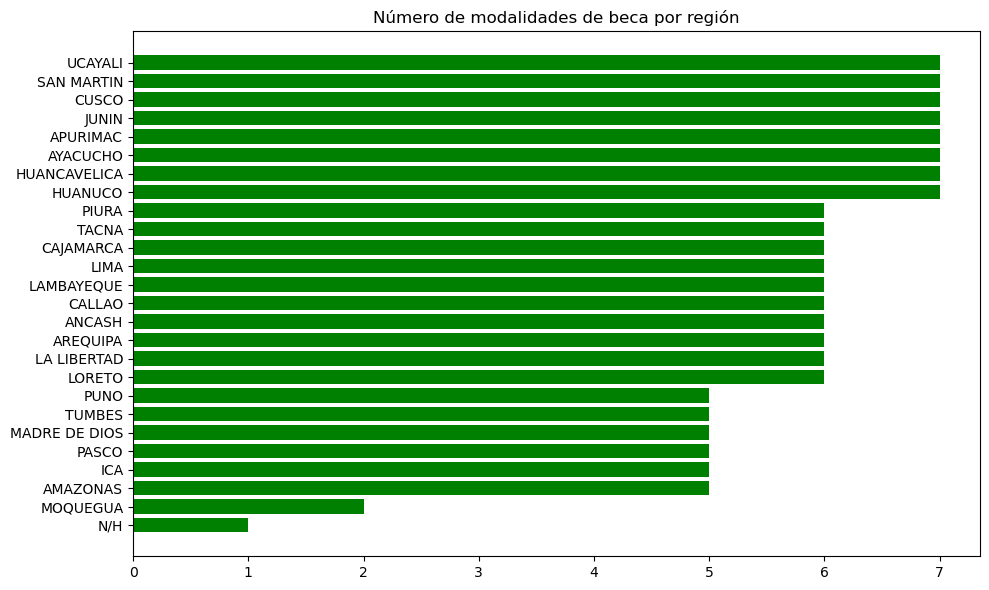

In [32]:
# Agrupamos por región y modalidad de beca, y luego contamos cuántos registros hay por cada combinación
conteo_modalidades_por_region = data.groupby('REGION')['MODALIDAD'].nunique().reset_index(name='num_modalidades').sort_values(by='num_modalidades')

# Graficamos el conteo de modalidades por región
plt.figure(figsize=(10, 6))
plt.barh(conteo_modalidades_por_region['REGION'], conteo_modalidades_por_region['num_modalidades'], color='green')
plt.title('Número de modalidades de beca por región')
plt.tight_layout()
plt.show()

* En la mayoría de regiones la demanda se distribuye entre 5 a 7 modalidades de beca.
* En Moquegua, la demanda se concentra para dos tipos de beca: ORDINARIA y FFAA. Pero, la demanda se concentra solo en la beca ORDINARIA, excepto de un postulante para la modalidad FFAA.

##### Oferta y Demanda

Si se evalua la oferta que tiene PRONABEC por modalidad y momento (1 y 2). Se obtiene esta información de las bases de la convocatoria.

In [199]:
path_oferta = 'input/oferta.xlsx'
oferta = pd.read_excel(path_oferta)
oferta

,MODALIDAD,MOMENTO,UNIVERSIDAD,INSTITUTO,TOTAL
0,ORDINARIA,1,6696,1584,8280
1,PROTECCIÓN,1,240,36,276
2,CNA y PA,1,624,252,876
3,EIB,1,240,0,240
4,FFAA,1,240,96,336
5,HUALLAGA,1,240,96,336
6,REPARED,1,1080,240,1320
7,VRAEM,1,240,96,336
8,ORDINARIA,2,4464,1056,5520
9,PROTECCIÓN,2,160,24,184


In [200]:
# Agrupar por MODALIDAD y calcular la suma de cada grupo
of_sum = oferta.groupby(by='MODALIDAD').sum()

# Ordenar por la columna TOTAL en orden descendente
of_mod_ordenado = of_sum.sort_values(by='MODALIDAD')

# Selecciona solo la columna TOTAL
of_mod_series = of_mod_ordenado['TOTAL']

# Cuenta postulantes por modalidad
dm_mod_series = data['MODALIDAD'].value_counts().sort_values(ascending=False)

# Convertir las series en DataFrames y pasando el indice a columna
of_mod = of_mod_series.to_frame().reset_index(drop=False, inplace=False)
dm_mod = dm_mod_series.to_frame().reset_index(drop=False, inplace=False)


In [236]:
df_combined = of_mod.merge(dm_mod, how='inner', on='MODALIDAD')
df_combined.columns = ['Modalidad','Oferta','Demanda']
df_combined

,Modalidad,Oferta,Demanda
0,CNA y PA,1460,2206
1,EIB,400,647
2,FFAA,560,430
3,HUALLAGA,560,842
4,ORDINARIA,13800,20936
5,PROTECCIÓN,460,102
6,REPARED,2200,3123
7,VRAEM,560,852


In [237]:
# Asegúrate de que 'MODALIDAD' es una columna y no el índice
df_combined.set_index('Modalidad', inplace=True)

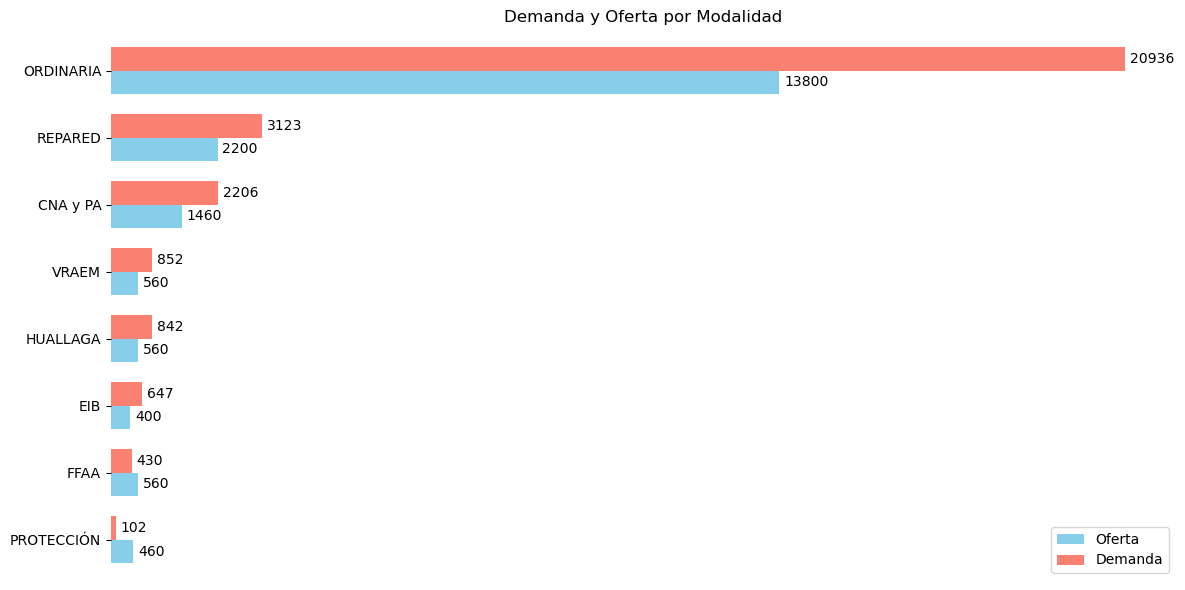

In [274]:
# Supongamos que 'resultado' es la serie que obtuviste
ax = df_combined.sort_values(by='Demanda',ascending=True).plot(kind='barh', figsize=(12,6), color=['skyblue', 'salmon'], width=0.7)

# Personalizar el gráfico
plt.title('Demanda y Oferta por Modalidad')

# Quitar los valores del eje vertical (ticks)
plt.xticks([])
ax.set_ylabel('')  # Eliminar el título del eje vertical

# Quitar el contorno alrededor del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Agregar los valores a las barras
for p in ax.patches:
    width = p.get_width()  # Obtiene el valor de la barra
    ax.text(width + 100, p.get_y() + p.get_height() / 2, str(int(width)), 
            va='center', ha='left', color='black', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

* En las 6 primeras categorías, aproximadamente entre 3 y 4 de cada 10 postulantes no accederían a una de las becas de su modalidad.
* En la Beca FF.AA., todos los preseleccionados accederían a una de estas becas integrales suponiendo que presentan la carta de ingreso a una IES. Este es el apartado donde aparece una pregunta ¿qué sucede con las 130 (560-430) becas adicionales de esta modalidad suponiendo que las 430 becas ya estarían asignadas a un postulante? ¿Se distribuye estas becas para otras modalidades? ¿Cómo se aborda está situación?
* De la misma forma, en la Beca Protección todos los preseleccionados de esta modalidad accederían a una de estas becas integrales. ¿Qué sucede con estas 358 (460-102) becas adicionales de esta modalidad? 

##### Distribución general del Puntaje Examen

In [146]:
def showDistribution(df, col, color, bins):
    # Histograma del puntaje final
    plt.figure(figsize=(12, 6))
    plt.hist(df[col], bins=bins, alpha=0.7, color=color, edgecolor=color)

    # Calcular los cuartiles, mediana y rango intercuartílico
    min = np.min(df[col])
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    median = np.median(df[col])
    max = np.max(df[col])

    # Añadir líneas para los cuartiles y la mediana
    plt.axvline(min, color='black', alpha=0, linestyle='dashed', linewidth=2, label=f'Minimo: {min:.2f}')
    plt.axvline(Q1, color='black', alpha=0.5, linestyle='dashed', linewidth=1.5, label=f'Q1: {Q1:.2f}')
    plt.axvline(median, color='black', alpha=0.5, linestyle='dashed', linewidth=1.5, label=f'Mediana: {median:.2f}')
    plt.axvline(Q3, color='black', alpha=0.5, linestyle='dashed', linewidth=1.5, label=f'Q3: {Q3:.2f}')
    plt.axvline(max, color='black', alpha=0, linestyle='dashed', linewidth=2, label=f'Maximo: {max:.2f}')

    # Titulos
    # plt.xlabel('Puntaje Final')
    # plt.ylabel('Número de Postulantes')
    plt.title(f'Distribución de: {col}')

    plt.legend()
    plt.grid(False)
    plt.show()

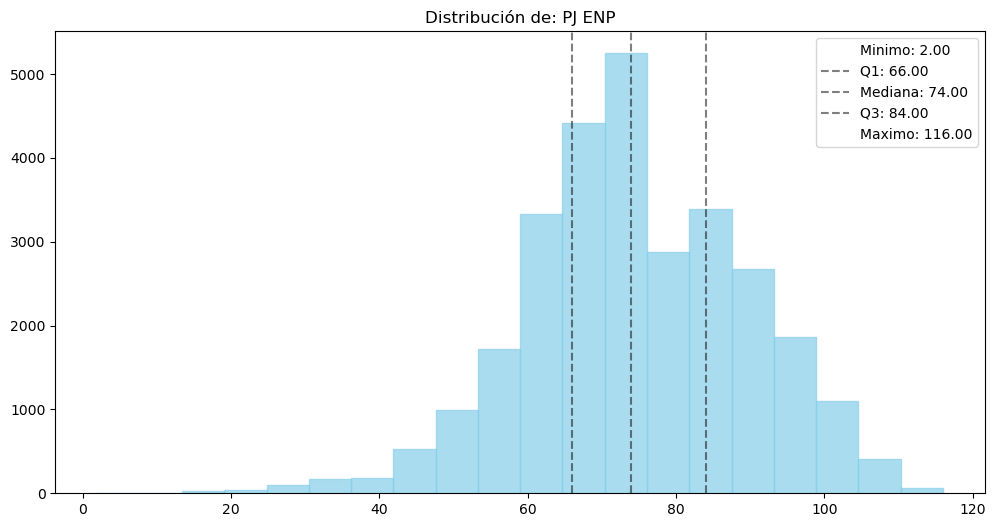

In [147]:
showDistribution(df=data, col='PJ ENP', color='skyblue', bins=20)

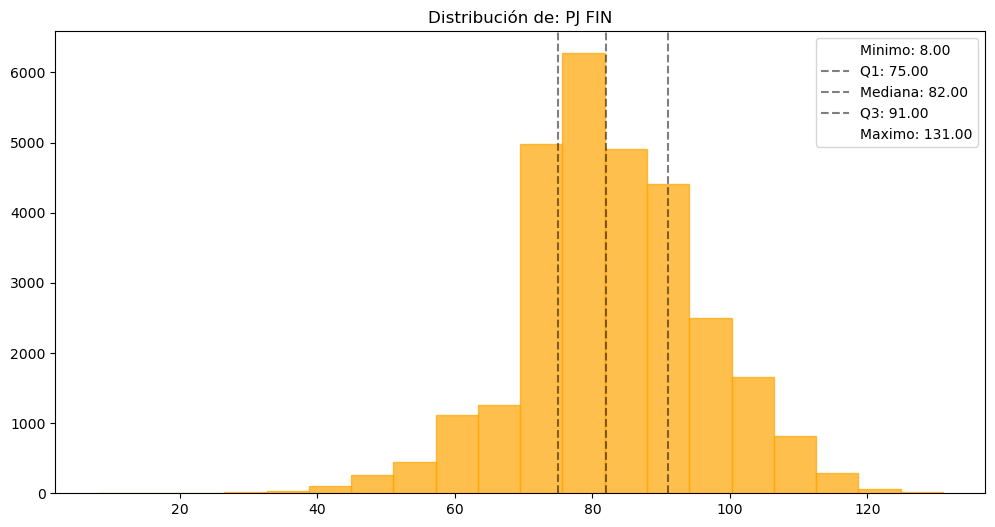

In [148]:
showDistribution(df=data, col='PJ FIN', color='orange', bins=20)

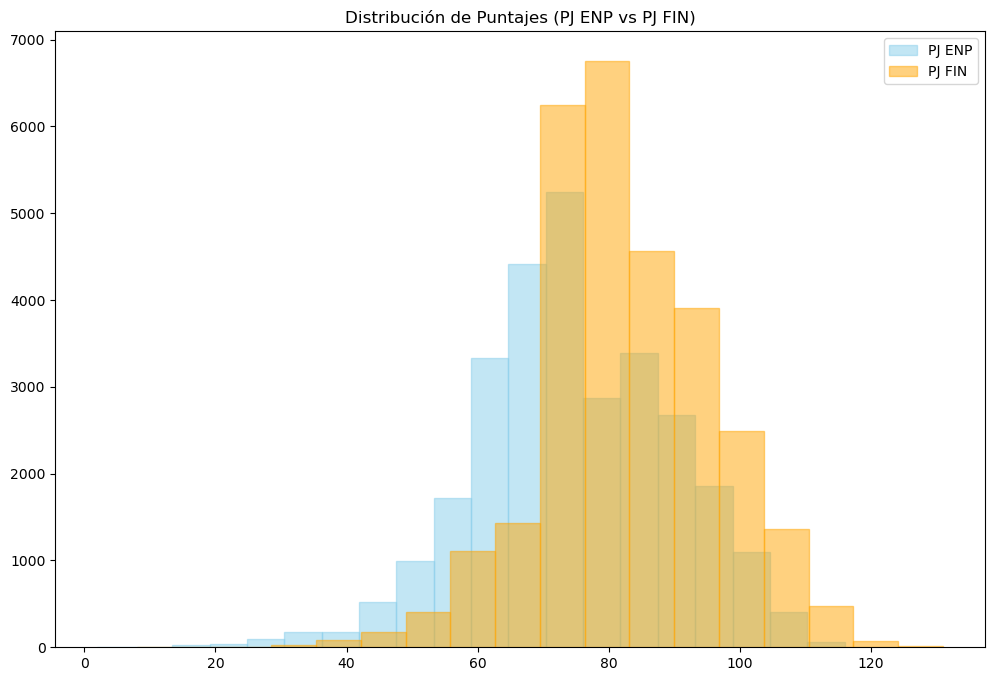

In [149]:
# Graficar los histogramas de las dos columnas en el mismo gráfico
plt.figure(figsize=(12,8))

# Histograma de la columna "PJ ENP"
plt.hist(data['PJ ENP'], bins=20, alpha=0.5, label='PJ ENP', color='skyblue', edgecolor='skyblue')

# Histograma de la columna "PJ FIN"
plt.hist(data['PJ FIN'], bins=18, alpha=0.5, label='PJ FIN', color='orange', edgecolor='orange')

# Etiquetas y título
plt.title('Distribución de Puntajes (PJ ENP vs PJ FIN)')
plt.grid(False)

# Leyenda para identificar las columnas
plt.legend()

# Mostrar el gráfico
plt.show()

##### Distribución de Puntaje Examen por Modalidad de Beca

In [38]:
min = data.groupby('MODALIDAD')['PJ ENP'].min()
q1 = data.groupby('MODALIDAD')['PJ ENP'].quantile(0.25)
q2 = data.groupby('MODALIDAD')['PJ ENP'].median()
q3 = data.groupby('MODALIDAD')['PJ ENP'].quantile(0.75)
max = data.groupby('MODALIDAD')['PJ ENP'].max()
counts = data['MODALIDAD'].value_counts()
averages = round(data.groupby('MODALIDAD')['PJ ENP'].mean(), 2)

iqr = q3 - q1
iqr_low = q1 - 1.5*iqr
iqr_sup = q3 + 1.5*iqr

In [39]:
dts = [min, iqr_low, q1, q2, q3, iqr_sup, max, iqr, counts, averages]
cols = ['MODALIDAD', 'MIN','IQR LOW', 'Q1','Q2','Q3', 'IQR SUP', 'MAX', 'IQR', 'COUNT', 'AVG']

In [40]:
box_vals = pd.concat(dts, axis=1)
box_vals.reset_index(inplace=True)
box_vals.columns = cols

In [41]:
box_vals

,MODALIDAD,MIN,IQR LOW,Q1,Q2,Q3,IQR SUP,MAX,IQR,COUNT,AVG
0,CNA y PA,6,28.0,52.0,58.0,68.0,92.0,112,16.0,2206,61.06
1,EIB,2,-26.0,34.0,52.0,74.0,134.0,104,40.0,647,54.50
2,FFAA,10,19.0,46.0,54.0,64.0,91.0,98,18.0,430,55.94
3,HUALLAGA,52,38.0,62.0,70.0,78.0,102.0,108,16.0,842,71.40
4,ORDINARIA,48,43.0,70.0,78.0,88.0,115.0,114,18.0,20936,78.66
5,PROTECCIÓN,30,17.0,50.0,60.0,72.0,105.0,108,22.0,102,62.47
6,REPARED,14,21.0,54.0,64.0,76.0,109.0,116,22.0,3123,65.57
7,VRAEM,52,42.0,66.0,74.0,82.0,106.0,110,16.0,852,75.11


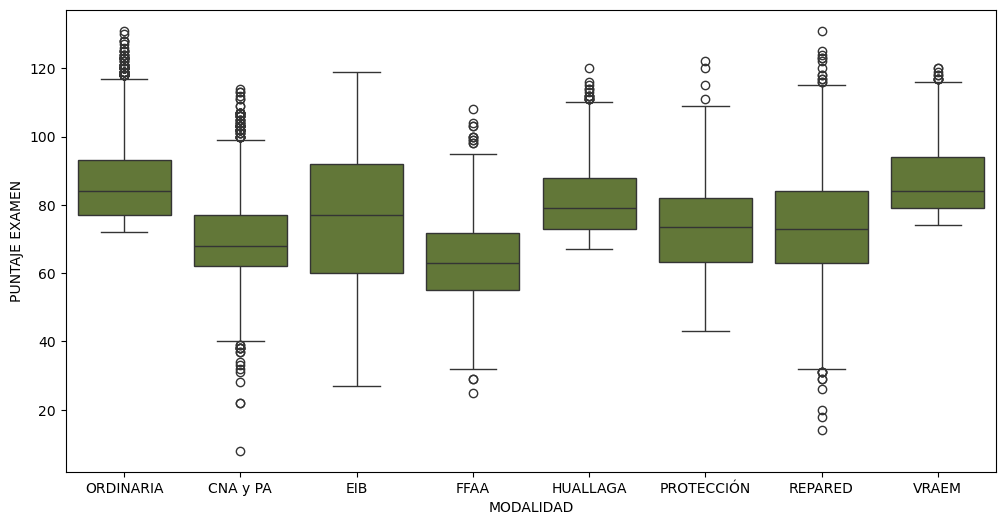

In [152]:
plt.figure(figsize=(12,6))
sns.boxplot(x='MODALIDAD', y='PJ FIN', data=data, color='#66812d')
plt.xlabel('MODALIDAD')
plt.ylabel('PUNTAJE EXAMEN')
plt.show()

C:\Users\wreyesas\AppData\Local\Temp\ipykernel_17116\3459713853.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MODALIDAD', y='PJ FIN', data=data, palette='Set2')


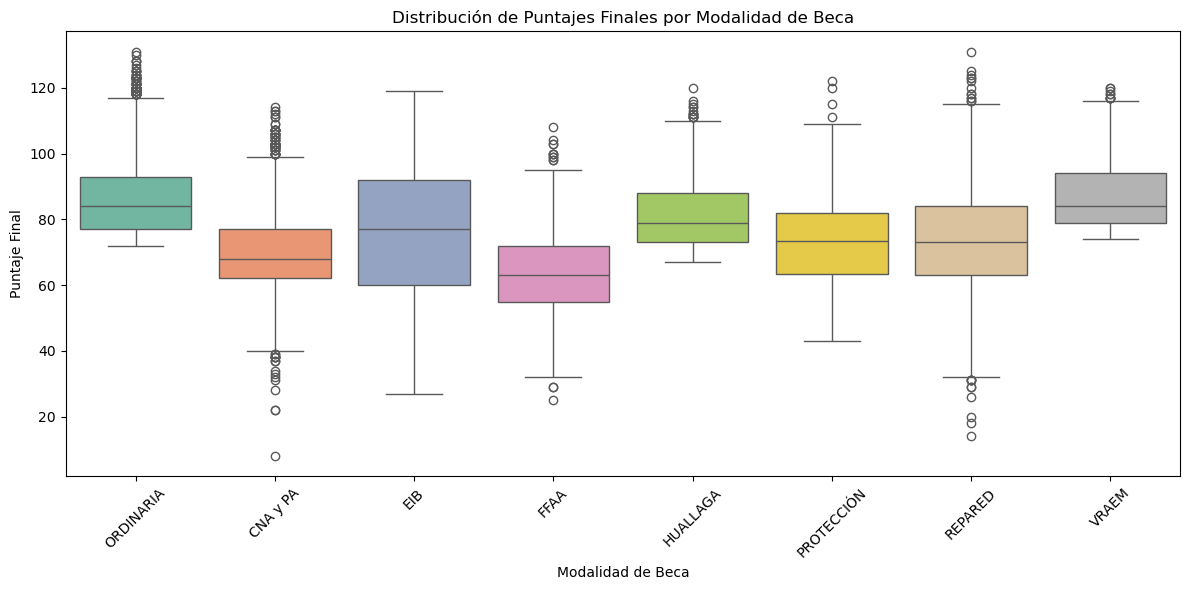

In [155]:
import seaborn as sns

# Boxplot de puntajes finales por modalidad de beca
plt.figure(figsize=(12, 6))
sns.boxplot(x='MODALIDAD', y='PJ FIN', data=data, palette='Set2')
plt.xlabel('Modalidad de Beca')
plt.ylabel('Puntaje Final')
plt.title('Distribución de Puntajes Finales por Modalidad de Beca')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ORDINARIA:
* Mínimo: 72 | Máximo: 117 | Mediana (Q2): 84
* Tiene un rango amplio de puntajes, con una mediana de de 84, lo que indica el mejor desempeño promedio.
* Presenta varios valores atípicos en la parte superior.

EIB:
* Mínimo: 27 | Máximo: 140 | Mediana (Q2): 77
* Se encuentra entre las modalidades con mayor rango, con un límite superior bastante alto (140) y una mediana de 77 superior a CNA y PA.
* Representa una modalidad con alto desempeño promedio.

FFAA:
* Mínimo: 25 | Máximo: 108 | Mediana (Q2): 63
* Presenta una mediana más baja que las otas modalidades.
* Amplia dispersión de datos y algunos valores atípicos bajos.

HUALLAGA:
* Mínimo: 67 | Máximo: 120 | Mediana (Q2): 79
* La mediana está alrededor de 79.
* Rango intercuartílico estrecho, indicando menor variabilidad. Modalidad con buen desempeño y menor dispersión.

PROTECCIÓN:
* Mínimo: 43 | Máximo: 122 | Mediana (Q2): 73.5
* Similar a HUALLAGA, con una mediana alrededor de 73.5 y menos dispersión de datos.
* Representa a un grupo pequeño, con valores atípicos en la parte alta.

REPARED:
* Mínimo: 14 | Máximo: 131 | Mediana (Q2): 73
* Muestra una mediana un poco menor que PROTECCIÓN de 73, pero con mayor dispersión (el IQR es mayor)
* Tiene casi el mismo rango intecuartílico que PROTECCIÓN, lo cual signfica que en estas modalidades el desempeño es similar.

VRAEM:
* Mínimo: 74 | Máximo: 120 | Mediana (Q2): 84
* Muy similar a ORDINARIA en mediana y rango, pero con menor número de postulantes (852).
* Representa una modalidad competitiva en desempeño.

CNA y PA:
* Mínimo: 8 | Máximo: 114 | Mediana (Q2): 68
* La mediana es una baja que la mayoría de las modalidades, cerca de 68.
* Amplia dispersión hacia valores bajos, indicando un desempeño menor en esta modalidad.
* Son los más bajos en general, con una mediana de 68 y valores * atípicos en la parte alta (por encima de 99.5).

##### Distribución de Puntaje Examen por Región

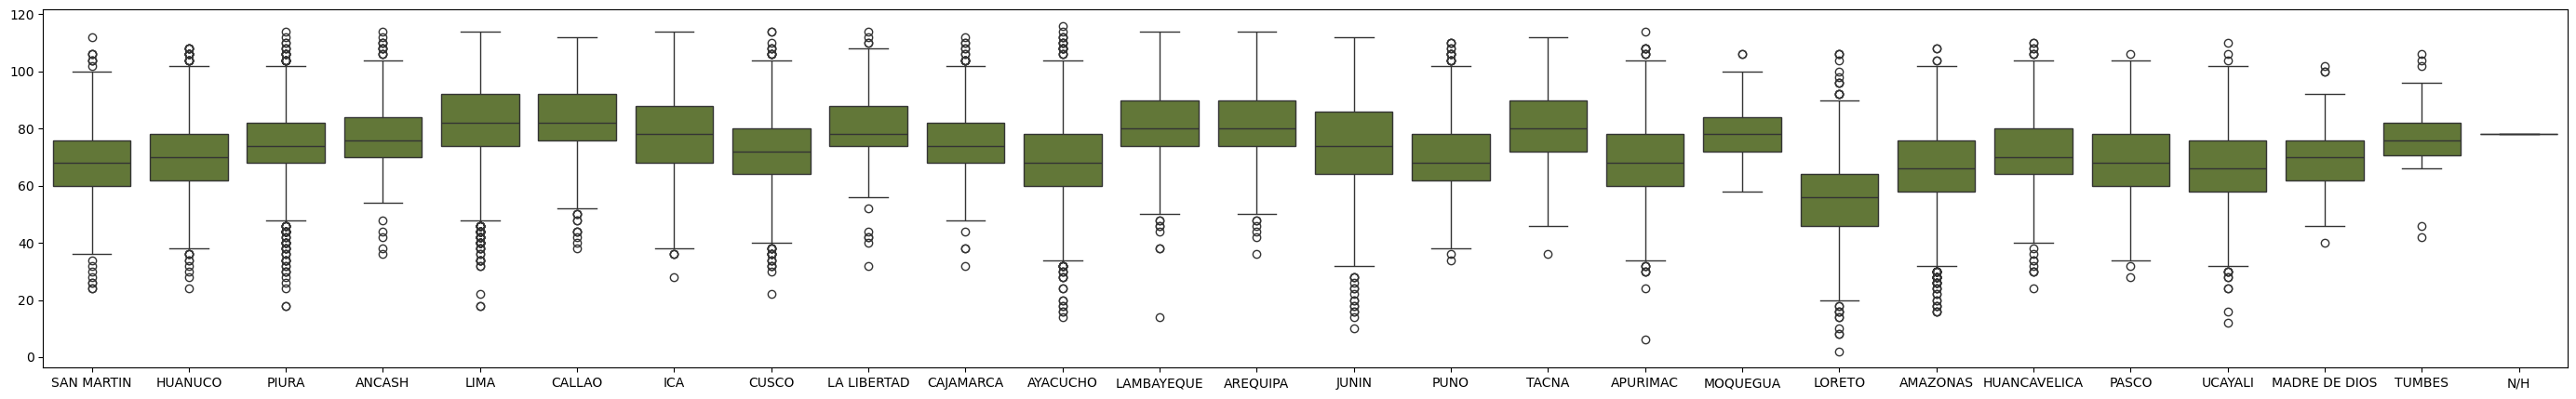

In [ ]:
plt.figure(figsize=(35,5))
sns.boxplot(x='REGION', y='PJ ENP', data=data, color='#66812d')
plt.xlabel('')
plt.ylabel('')
plt.show()

C:\Users\wreyesas\AppData\Local\Temp\ipykernel_17116\1642708290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='REGION', y='PJ FIN', data=data, palette='Set3')


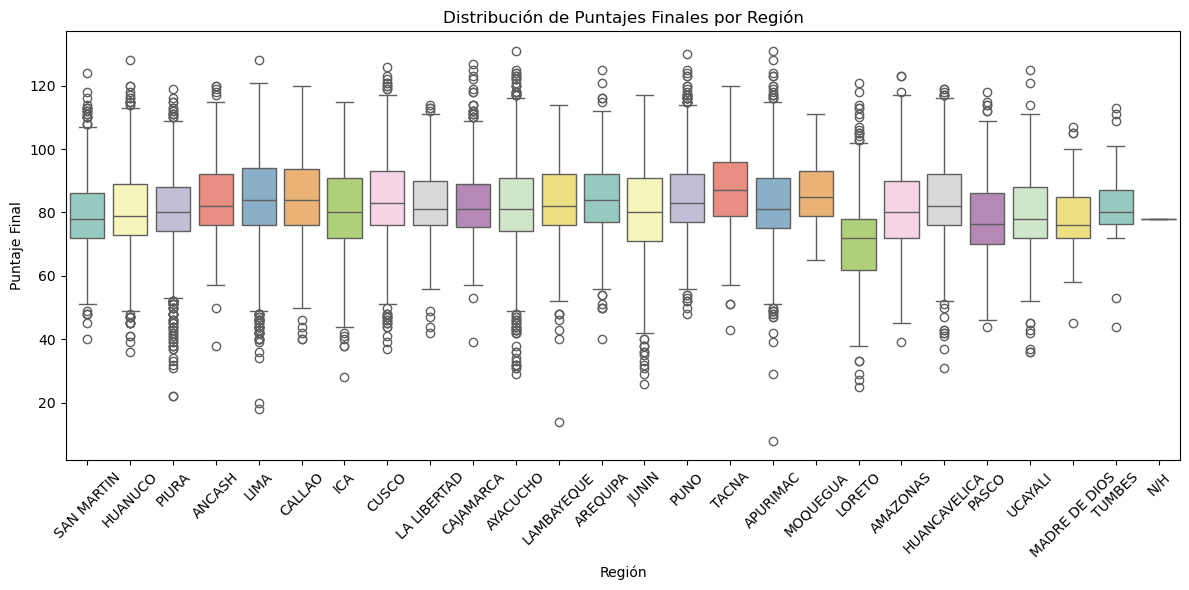

In [153]:
# Boxplot de puntajes finales por región
plt.figure(figsize=(12, 6))
sns.boxplot(x='REGION', y='PJ FIN', data=data, palette='Set3')
plt.xlabel('Región')
plt.ylabel('Puntaje Final')
plt.title('Distribución de Puntajes Finales por Región')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
